In [1]:
#pandas is a one of the library ,its use to read the database like excel and number related files , 
#it is used for separating the input and output data set
import pandas as pd

In [2]:
#here weare reading the dataset from the inbuild function of pandas
dataset=pd.read_csv("Social_Network_Ads.csv")
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
# herewe are changing the catagrical input to numerical input 
# new function
dataset=pd.get_dummies(dataset,dtype=int,drop_first=True)

In [4]:
dataset

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1
...,...,...,...,...,...
395,15691863,46,41000,1,0
396,15706071,51,23000,1,1
397,15654296,50,20000,1,0
398,15755018,36,33000,0,1


In [5]:
# this is a new function for reading the input and output names
#then here we are separating the input and output with the variables
dataset.columns

Index(['User ID', 'Age', 'EstimatedSalary', 'Purchased', 'Gender_Male'], dtype='object')

In [6]:
#removing the unused column 
dataset=dataset.drop("User ID",axis=1)

In [7]:
#finding the count of the purchased and unpurchased count or class count
dataset["Purchased"].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [9]:
#then here we are separating the input and output with the variables
independent=dataset[['Age', 'EstimatedSalary', 'Gender_Male']]
dependent=dataset[[ 'Purchased']]
independent
dependent

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [10]:
#sklearn is also one of the library ,we are going to use the libray in every machine learnin project ,its like a default 
#library for ML
#here we are separating the input and output dataset for training and testing prpose ,we are taking 70% for training and 30% for testing testin
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(independent, dependent, test_size=0.30, random_state=0)

In [13]:
#module creation with classifier 
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion="entropy",splitter="best")
classifier.fit(X_train,Y_train)
classifier

DecisionTreeClassifier(criterion='entropy')

In [14]:
# reading baias value
classifier.feature_importances_

array([0.47396354, 0.49261364, 0.03342283])

In [15]:
#reading  maximum feature
classifier.max_features_

3

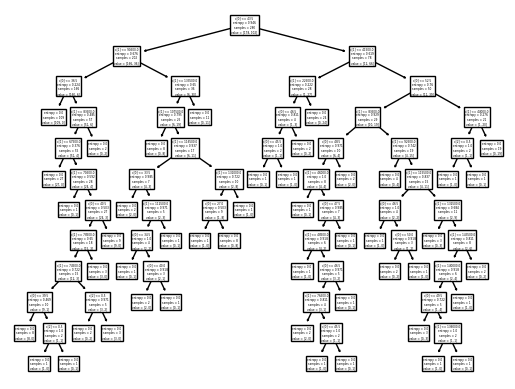

In [16]:
# here we are seeing thevisual of decision treereg 
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(classifier)
plt.show()

In [17]:
#here we are predicting the value of teste input with the created module
y_prediction=classifier.predict(X_test)

In [18]:
#validation with confusion matrix
from sklearn.metrics import confusion_matrix
cfm=confusion_matrix(Y_test,y_prediction)
cfm

array([[71,  8],
       [ 4, 37]], dtype=int64)

In [22]:
#checking the validation perfomance
from sklearn.metrics import classification_report
cr=classification_report(Y_test,y_prediction)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        79
           1       0.82      0.90      0.86        41

    accuracy                           0.90       120
   macro avg       0.88      0.90      0.89       120
weighted avg       0.90      0.90      0.90       120

